In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [10]:
#the column name: ip means integrated profile, and curve is DM-SNR curve. This is a dataset with no missing values(NA), which is mentioned in the dataset information
# this cell is used for summarizing data in different ways
url <- "https://raw.githubusercontent.com/BorisZhang12/Project-DSCI-100/main/HTRU_2.csv"
htru_data <- read_csv(url,
                      col_names= c("mean_ip","deviation_ip","excess_kurtosis_ip"
                                 ,"skewness_ip","mean_curve","deviation_curve","excess_kurtosis_curve",
                                 "skewness_curve","Class"))|>
            mutate(Class = as_factor(Class))
htru_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_ip, deviation_ip, excess_kurtosis_ip, skewness_ip, mean_curve,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


The table above allows us to take a look at what our data and data frame looks like

In [8]:
#separate data into testing and training. 80% are training, the rest are testing
htru_split <- initial_split(htru_data,prop=0.8,strat=Class)
htru_train <- training(htru_split)
htru_test <- testing(htru_split)


In [11]:
#create a table to see the percentage of each class, and the number of observations in each class
htru_proptions <- htru_train|>
                    group_by(Class)|>
                    summarize(n=n())|>
                    mutate(percent = 100*n/nrow(htru_train))
htru_proptions

Class,n,percent
<fct>,<int>,<dbl>
0,12958,90.501467
1,1360,9.498533


The table above shows the number of Class 0 and Class 1 observations in our data set and the relative percentage. This allows us to see if we may need to upsample one of the Classes.

In [13]:
#the means of the predictor variables
htru_mean_overall <- htru_train|>
                map_df(mean)        
htru_mean_overall



Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.8812,46.53688,0.4853281,1.803649,12.73855,26.47574,8.280226,104.6392,NA


This table shows the mean value for each of our variables. This shows us that there are no missing data values beacause we have valid calculations.

In [14]:
htru_mean_by_class <- htru_train|>
                        group_by(Class)|>
                        summarize(mean_ip = mean(mean_ip),
                                 deviation_ip=mean(deviation_ip),
                                 excess_kurtosis_ip=mean(excess_kurtosis_ip),
                                 skewness_ip=mean(skewness_ip),
                                 mean_curve=mean(mean_curve),
                                 deviation_curve=mean(deviation_curve),
                                 excess_kurtosis_curve=mean(excess_kurtosis_curve),
                                 skewness_curve=mean(skewness_curve))
htru_mean_by_class

Class,mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.52726,47.35395,0.2102034,0.3775884,8.856881,23.33599,8.859742,113.73456
1,57.08568,38.75188,3.1067000,15.3910755,49.722904,56.39108,2.758627,17.97874


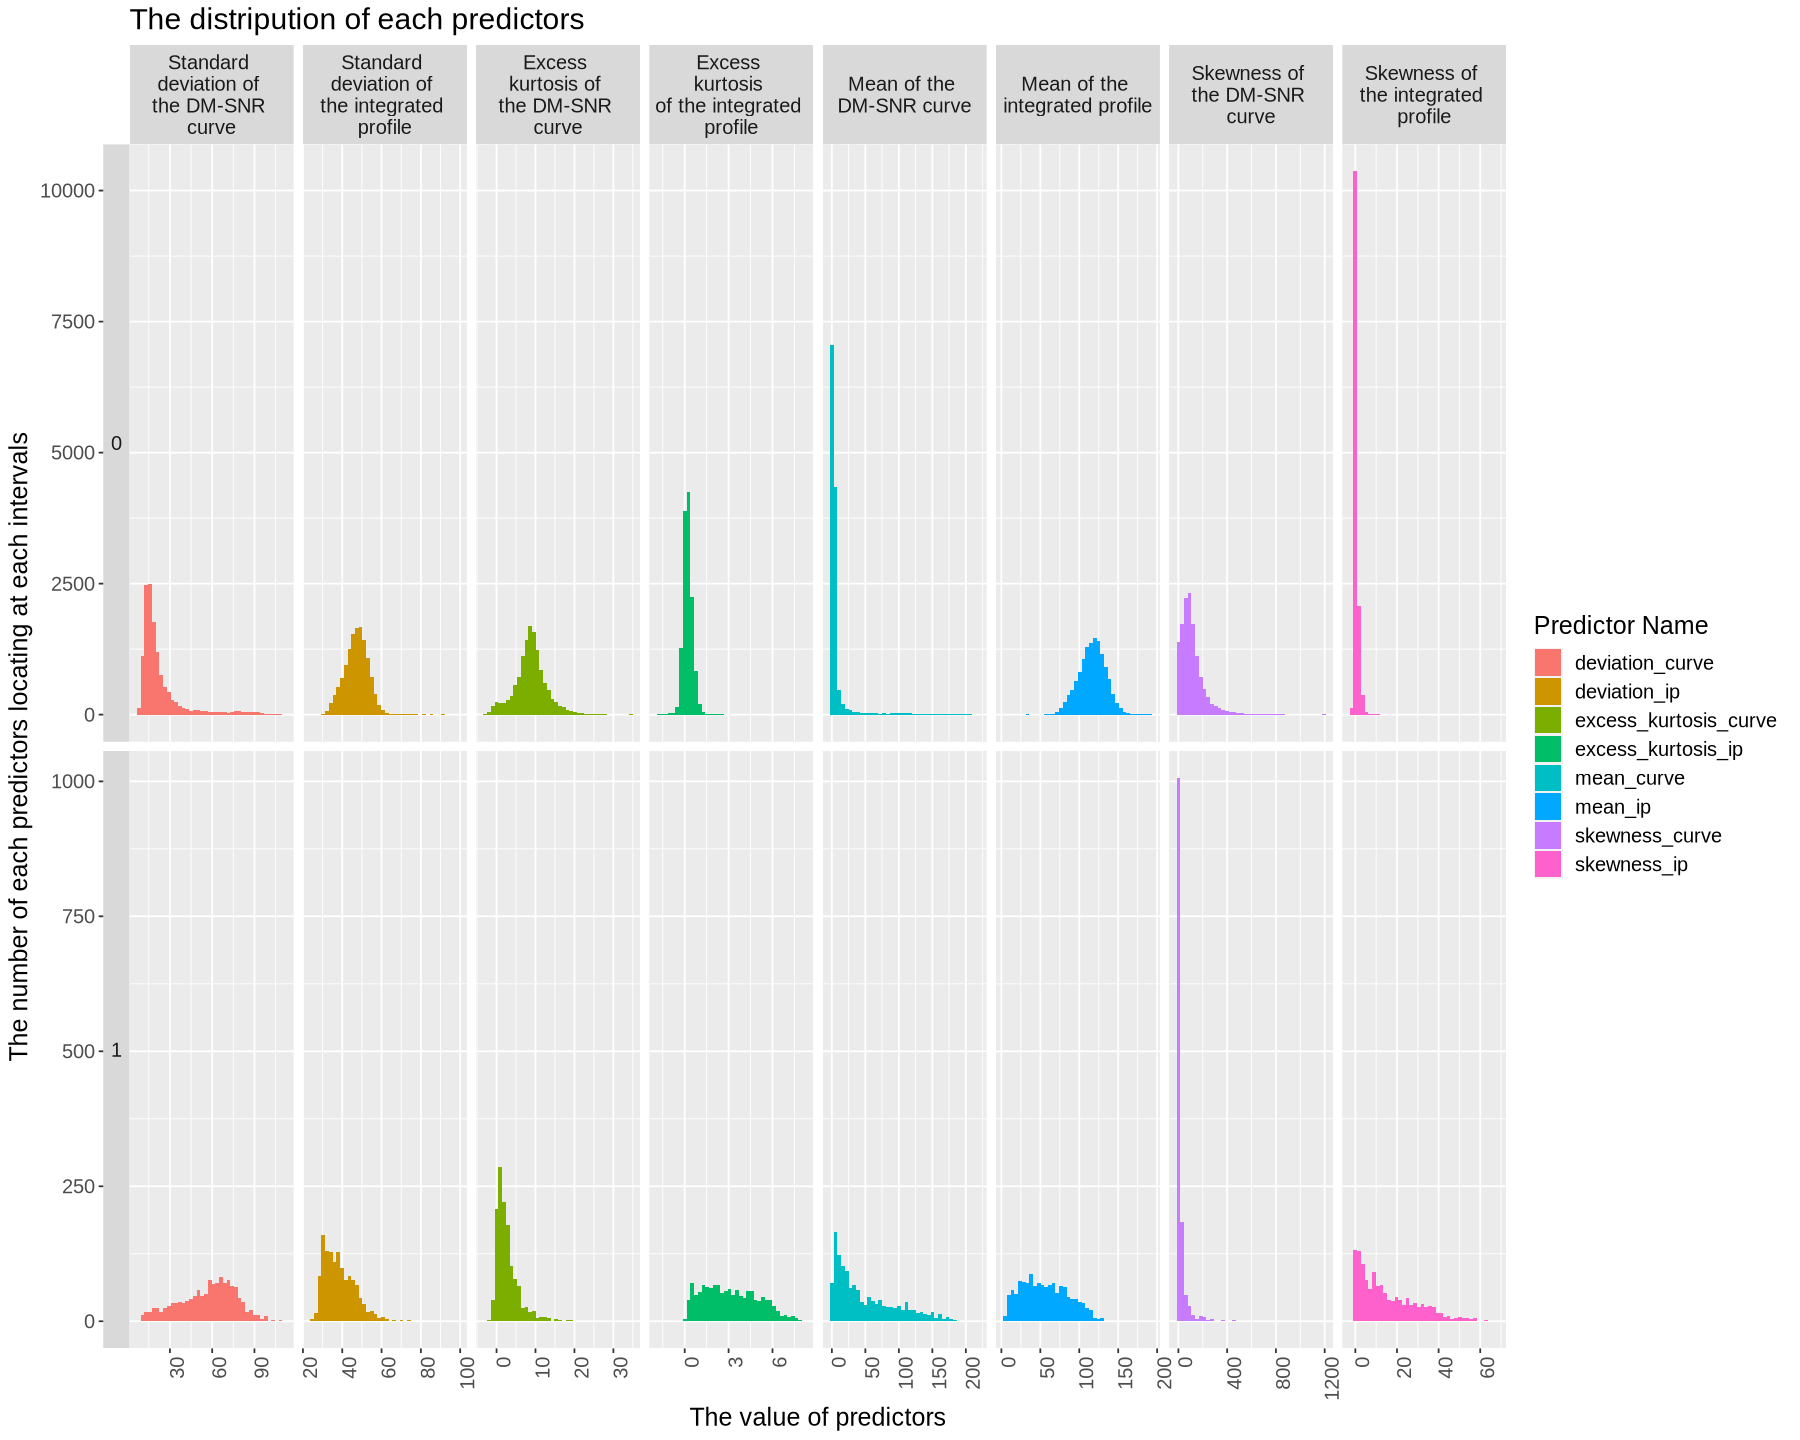

In [33]:
#this cell is used for data visualization
htru_train_longer <- pivot_longer(htru_train, cols = mean_ip:skewness_curve,
                                            names_to = "predictors",
                                             values_to = "val")
predictors_labels <- c(mean_ip = "Mean of the \nintegrated profile",
                      deviation_ip = "Standard \ndeviation of \nthe integrated \nprofile",
                      excess_kurtosis_ip = "Excess \nkurtosis \nof the integrated \nprofile",
                      skewness_ip = "Skewness of \nthe integrated \nprofile",
                      mean_curve = "Mean of the \nDM-SNR curve",
                      deviation_curve = "Standard \ndeviation of \nthe DM-SNR \ncurve",
                      excess_kurtosis_curve="Excess \nkurtosis of \nthe DM-SNR \ncurve",
                      skewness_curve = "Skewness of \nthe DM-SNR \ncurve")
options(repr.plot.width = 15, repr.plot.height = 12)
htru_train_plot <-htru_train_longer|>
                    ggplot(aes(x=val,fill=predictors))+
                    geom_histogram(bins=40)+
                    labs(x="The value of predictors",y="The number of each predictors locating at each intervals",fill="Predictor Name")+
                    facet_grid(rows=vars(Class),cols=vars(predictors),switch="y",scales = "free",labeller = labeller(predictors = predictors_labels))+
                     theme(axis.text.x = element_text(angle = 90, hjust = 1),
                     strip.text.y.left = element_text(angle = 0),
                     text = element_text(size = 15))+ggtitle("The distripution of each predictors")
htru_train_plot

This graph compares the distripution of each predictors.